In [218]:
import pandas as pd
import matplotlib as mp
df = pd.read_csv('world_bank_development_indicators.csv',parse_dates=True)
df['date'] =  pd.to_datetime(df['date'])

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   country                                    17272 non-null  object        
 1   date                                       17272 non-null  datetime64[ns]
 2   agricultural_land%                         14714 non-null  float64       
 3   forest_land%                               8176 non-null   float64       
 4   land_area                                  14930 non-null  float64       
 5   avg_precipitation                          10086 non-null  float64       
 6   trade_in_services%                         9195 non-null   float64       
 7   control_of_corruption_estimate             4783 non-null   float64       
 8   control_of_corruption_std                  4783 non-null   float64       
 9   access_to_electri

In [220]:
df.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

In [227]:
df = df[['date','country','population', 'individuals_using_internet%','tax_revenue%','electric_power_consumption', 'control_of_corruption_estimate','CO2_emisions']]

In [228]:
ds = df.dropna()

In [229]:
ds

,date,country,population,individuals_using_internet%,tax_revenue%,electric_power_consumption,control_of_corruption_estimate,CO2_emisions
228,1996-01-01,Albania,3168033.0,0.032197,8.861719,904.346640,-0.893903,1968.00
230,1998-01-01,Albania,3128530.0,0.065027,14.568944,734.849914,-0.992025,1804.55
234,2002-01-01,Albania,3051010.0,0.390081,16.484242,1578.165919,-0.845341,3761.90
235,2003-01-01,Albania,3039616.0,0.971900,17.196138,1469.264539,-0.853787,4137.40
236,2004-01-01,Albania,3026939.0,2.420388,17.965076,1797.525487,-0.723732,4322.30
...,...,...,...,...,...,...,...,...
17198,2014-01-01,Zambia,15737793.0,6.500000,15.761030,701.940863,-0.347683,4686.00
17257,2009-01-01,Zimbabwe,12679810.0,4.000000,9.196892,578.399834,-1.357875,7572.70
17258,2010-01-01,Zimbabwe,12839771.0,6.400000,17.434924,599.932818,-1.373287,9518.00
17259,2011-01-01,Zimbabwe,13025785.0,8.400000,17.928254,629.827684,-1.425627,11357.60


In [230]:
ds = ds.groupby('country',).max()


TypeError: Series.corr() missing 1 required positional argument: 'other'

<Axes: xlabel='date'>

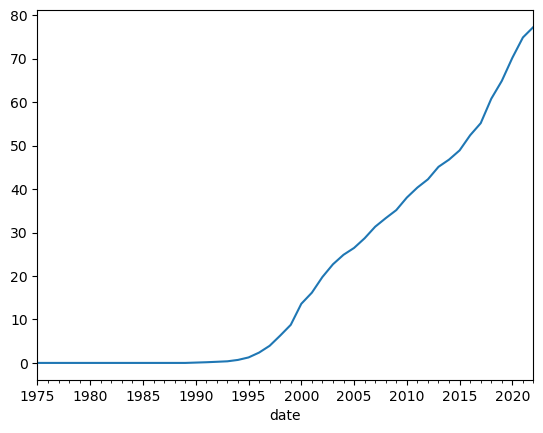

In [158]:
ds.groupby(by='date')['individuals_using_internet%'].mean().plot()

In [108]:
df.groupby(by='date')['net population'].mean().tail(10)

date
2013-01-01    1.435870e+10
2014-01-01    1.485493e+10
2015-01-01    1.577297e+10
2016-01-01    1.692934e+10
2017-01-01    1.784260e+10
2018-01-01    2.206039e+10
2019-01-01    2.191564e+10
2020-01-01    2.515774e+10
2021-01-01    3.001309e+10
2022-01-01    5.001266e+09
Name: net population, dtype: float64

In [65]:

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])



In [67]:
df_pivot2 = df.pivot(index='date', columns='country', values='individuals_using_internet%')


ValueError: Index contains duplicate entries, cannot reshape

In [50]:
df = df[['country', 'date','tax_revenue%','individuals_using_internet%','control_of_corruption_estimate', 'control_of_corruption_std','CO2_emisions','electric_power_consumption','access_to_electricity%']]
df_noNull= df.dropna()
df_noNull['individuals_using_internet%'].describe()



count    1398.000000
mean       33.866268
std        28.865051
min         0.000426
25%         6.500000
50%        27.980000
75%        58.000000
max        98.160000
Name: individuals_using_internet%, dtype: float64

In [51]:
ds= df_noNull.groupby(by='country')['individuals_using_internet%'].mean().sort_values(ascending=False)
ds

country
Iceland        79.494844
Norway         76.779612
Sweden         76.290146
Denmark        73.542868
New Zealand    72.708893
                 ...    
Myanmar         1.530581
Ethiopia        1.482600
Tajikistan      0.063554
Pakistan        0.043948
Sudan           0.004805
Name: individuals_using_internet%, Length: 115, dtype: float64

In [52]:
# Create sample data
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = np.random.randn(100).cumsum()

NameError: name 'np' is not defined

In [53]:
df_net = df_noNull[['date', 'country', 'individuals_using_internet%']]
df_noNull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1398 entries, 228 to 17260
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   country                         1398 non-null   object        
 1   date                            1398 non-null   datetime64[ns]
 2   tax_revenue%                    1398 non-null   float64       
 3   individuals_using_internet%     1398 non-null   float64       
 4   control_of_corruption_estimate  1398 non-null   float64       
 5   control_of_corruption_std       1398 non-null   float64       
 6   CO2_emisions                    1398 non-null   float64       
 7   electric_power_consumption      1398 non-null   float64       
 8   access_to_electricity%          1398 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 109.2+ KB


<Axes: xlabel='date'>

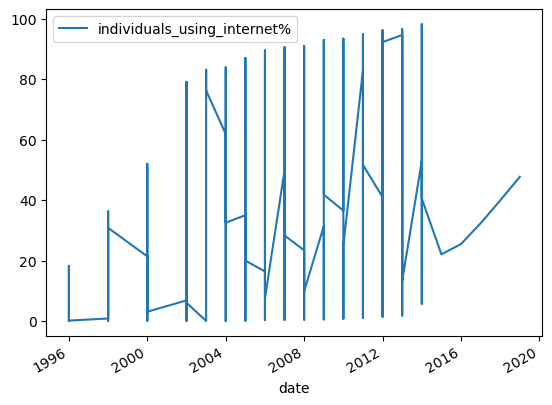

In [54]:
df_net.plot(x='date', y='individuals_using_internet%')


In [57]:
df_net

,date,country,individuals_using_internet%
228,1996-01-01,Albania,0.032197
230,1998-01-01,Albania,0.065027
234,2002-01-01,Albania,0.390081
235,2003-01-01,Albania,0.971900
236,2004-01-01,Albania,2.420388
...,...,...,...
17198,2014-01-01,Zambia,6.500000
17257,2009-01-01,Zimbabwe,4.000000
17258,2010-01-01,Zimbabwe,6.400000
17259,2011-01-01,Zimbabwe,8.400000


/var/folders/sr/241q14dn6f5g00w41xx6z4lm0000gn/T/ipykernel_72130/4175271360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_net['date'] = pd.to_datetime(df_net['date'])


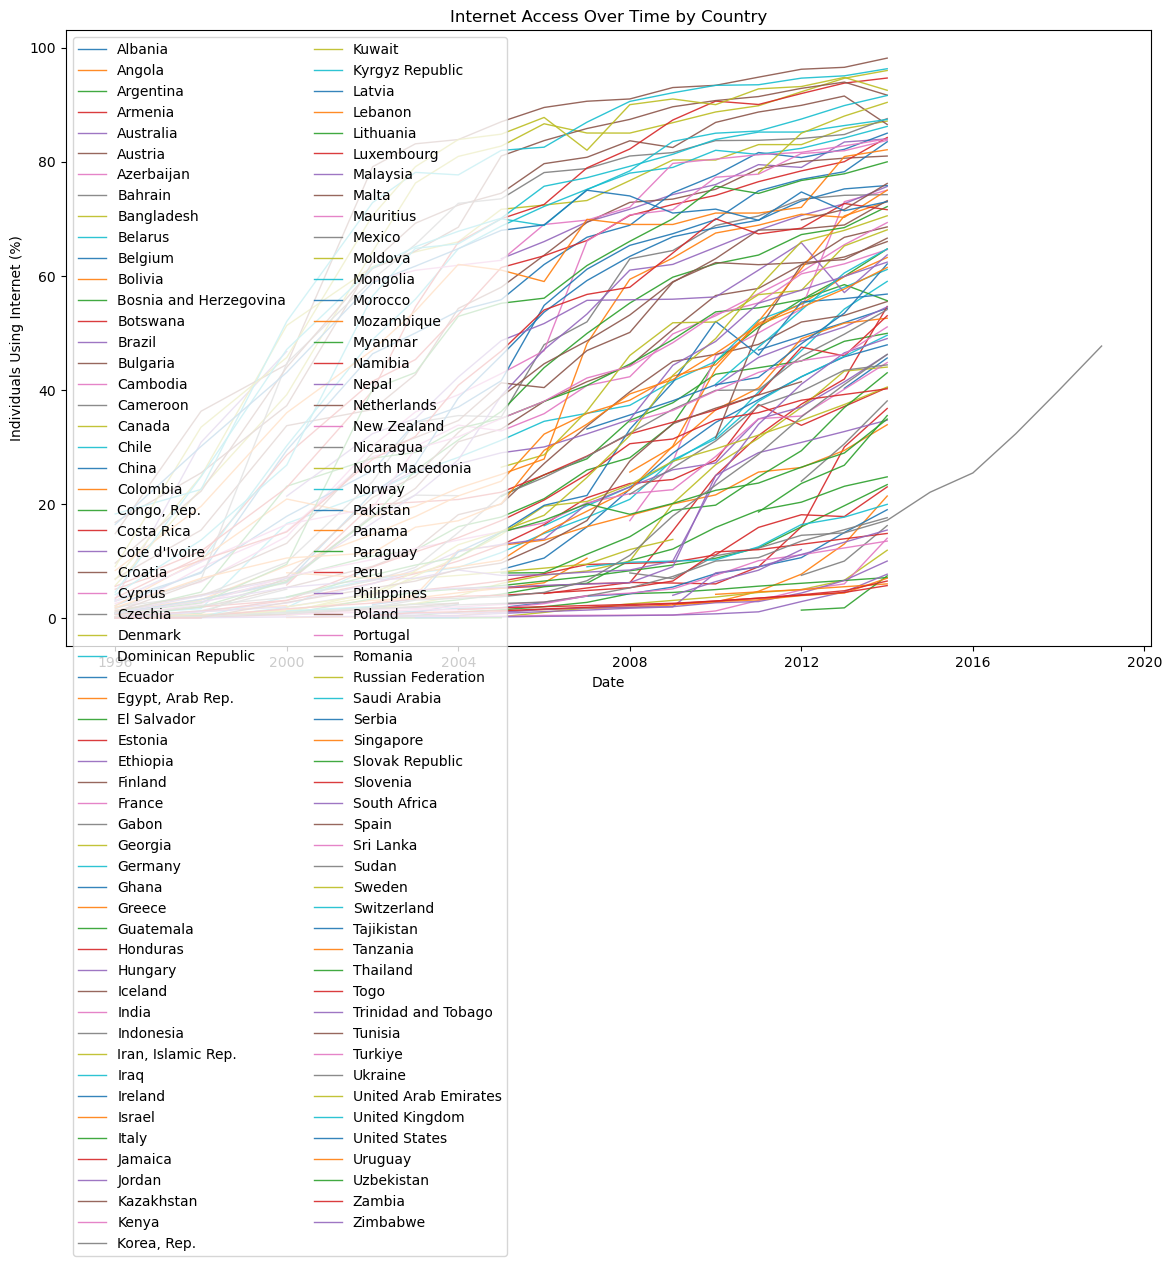

In [58]:
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
df_net['date'] = pd.to_datetime(df_net['date'])

# Pivot the data
df_pivot = df_net.pivot(index='date', columns='country', values='individuals_using_internet%')

# Plot the data
plt.figure(figsize=(14, 8))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='', linewidth=1, alpha=0.9, label=column)

plt.legend(loc='upper left', ncol=2)
plt.title("Internet Access Over Time by Country")
plt.xlabel("Date")
plt.ylabel("Individuals Using Internet (%)")
plt.show()

In [25]:
df_pivot

country,Albania,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,...,Tunisia,Turkiye,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
1996-01-01,0.032197,NaN,0.141955,NaN,3.275250,6.909162,NaN,0.843254,NaN,0.029298,...,0.027615,NaN,NaN,NaN,4.123650,16.419353,1.847472,NaN,0.009069,NaN
1998-01-01,0.065027,NaN,0.830767,NaN,30.813239,15.421219,NaN,3.218202,NaN,0.073869,...,0.107941,NaN,NaN,6.908303,13.669983,30.093197,6.987069,NaN,0.030226,NaN
2000-01-01,NaN,0.105046,7.038683,NaN,46.756116,33.730133,NaN,6.153733,NaN,1.860398,...,2.750740,NaN,0.716184,NaN,26.821754,43.079163,10.539058,NaN,NaN,NaN
2002-01-01,0.390081,0.270377,10.882124,NaN,NaN,36.560000,NaN,18.050721,0.139920,8.950971,...,5.252887,NaN,1.873885,NaN,56.480000,58.785404,11.419470,NaN,0.477751,NaN
2003-01-01,0.971900,0.370682,11.913697,NaN,NaN,42.700000,NaN,21.554945,0.163878,NaN,...,6.490846,NaN,3.148128,NaN,64.820000,61.697117,15.937137,NaN,0.980483,NaN
2004-01-01,2.420388,0.464815,16.036684,4.899009,NaN,54.280000,NaN,21.458681,0.199036,NaN,...,8.528818,NaN,3.489478,NaN,65.610000,64.758256,17.063098,NaN,1.100000,NaN
2005-01-01,NaN,1.143367,17.720583,5.252983,63.000000,58.000000,NaN,NaN,0.241637,NaN,...,9.655087,NaN,3.749764,NaN,70.000000,67.968053,20.088190,NaN,1.300000,NaN
2006-01-01,NaN,1.500000,20.927202,5.631788,66.000000,63.600000,NaN,NaN,1.000000,16.200000,...,12.986409,NaN,4.506125,NaN,68.820000,68.931193,29.400000,NaN,1.600000,NaN
2007-01-01,NaN,1.700000,25.946633,6.021253,69.450000,69.370000,NaN,NaN,1.800000,19.700000,...,17.100000,NaN,6.550000,NaN,75.090000,75.000000,34.000000,NaN,1.900000,NaN


In [41]:
df_net[df_net['date'].str.contains('2014')].sort_values(by='individuals_using_internet%', ascending=False).head(100)



,date,country,individuals_using_internet%
7187,2014,Iceland,98.160000
7186,2014,Iceland,96.546800
11857,2014,Norway,96.300000
7185,2014,Iceland,96.209800
3797,2014,Denmark,95.990000
...,...,...,...
5326,2014,Finland,82.490000
5777,2014,Germany,82.349998
9516,2014,Luxembourg,82.230000
1397,2014,Belgium,82.170200


In [68]:
df_net.groupby('country')['individuals_using_internet%'].mean().sort_values(ascending=False).head(10)


100 
200
300


,date,country,individuals_using_internet%
228,1996-01-01,Albania,0.032197
230,1998-01-01,Albania,0.065027
234,2002-01-01,Albania,0.390081
235,2003-01-01,Albania,0.971900
236,2004-01-01,Albania,2.420388
...,...,...,...
17198,2014-01-01,Zambia,6.500000
17257,2009-01-01,Zimbabwe,4.000000
17258,2010-01-01,Zimbabwe,6.400000
17259,2011-01-01,Zimbabwe,8.400000
